# Plotting of Data

# 1. Population Size - Bar Chart

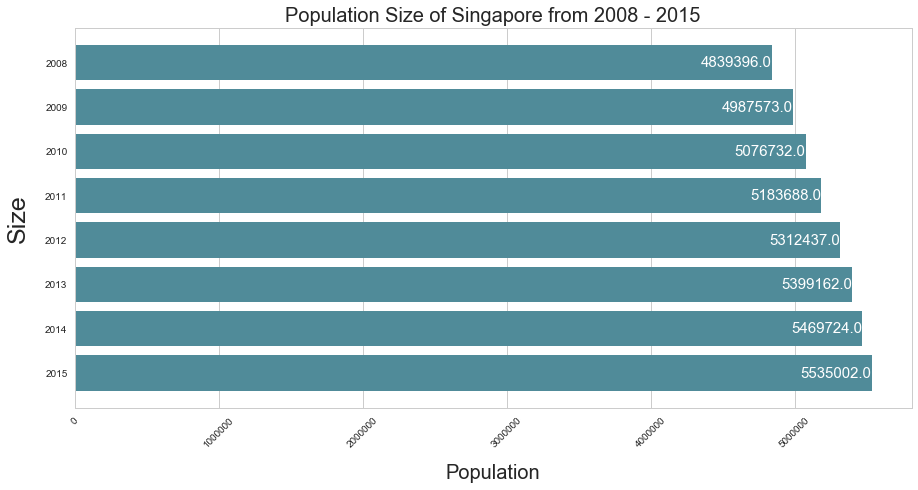

In [149]:
% matplotlib inline
import pandas as pd
import pymongo
from pymongo import MongoClient
import matplotlib.pyplot as plt
import seaborn as sns

client = MongoClient()
db = client['pds_CA2']

# Retrieve data from mongoDB
dataPopulation = pd.DataFrame(list(db.populationSize.find()))
# rearranging the columns
dataPopulation = dataPopulation[['year', 'population', '_id']]

# Setting the axis
x_axis = dataPopulation['year']
y_axis = dataPopulation['population']

# Plotting graph
barChart = plt.figure(figsize = (15, 7))
axis = barChart.add_subplot(111)## Set title
plt.title('Population Size of Singapore from 2008 - 2015', fontsize = 20)## Set x and y labels
plt.xlabel('Population', fontsize = 20, labelpad = 15)
plt.ylabel('Size', fontsize = 25, labelpad = 15)## Rotate x ticks
plt.xticks(rotation = 45)
bar_width = 0.8# Plot horizontal bar chart
bar1 = axis.barh(x_axis, y_axis, bar_width, color = '#508b99', label = x_axis)
# Set 2008 to appear fisrt then 2015 the last
axis.invert_yaxis()
# Display value of each bar within the bar
for i, (p, pr) in enumerate(zip(x_axis, y_axis)):
    plt.text(s = str(pr), x = pr, y = i, color = "w",
    verticalalignment = "center", horizontalalignment = "right", size = 15)

# set style
sns.set(style = 'whitegrid')
axis.yaxis.grid()
plt.show()

# Crime Rates - Line Chart


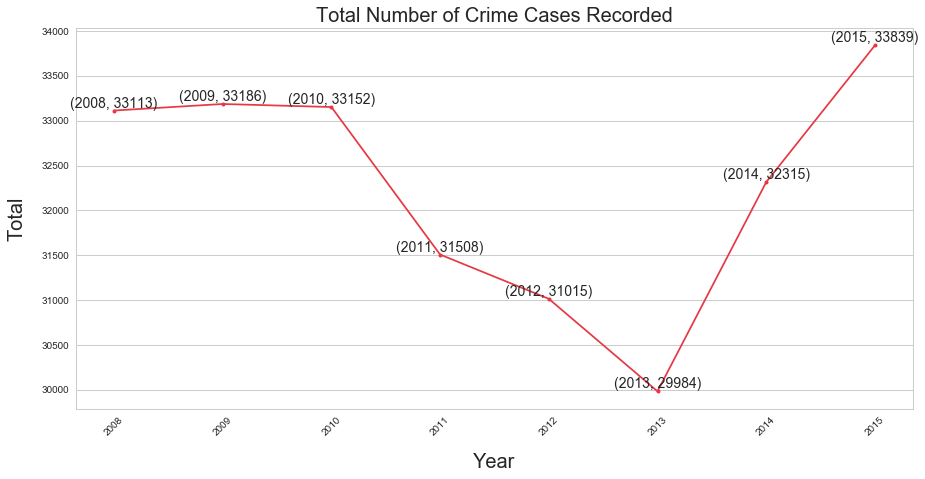

In [131]:
%matplotlib inline 
import pandas as pd
import pymongo
from pymongo import MongoClient
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

client = MongoClient()
db = client['pds_CA2']

# Retrieve data from mongoDB
dataCrime = pd.DataFrame(list(db.crimeRates.find()))

# Plotting graph
scatterPlot = plt.figure(figsize=(15,7))
axis2 = scatterPlot.add_subplot(111)
## Set title
plt.title('Total Number of Crime Cases Recorded', fontsize=20)
## Set x and y labels
plt.xlabel('Year', fontsize=20, labelpad=15)
plt.ylabel('Total', fontsize=20, labelpad=15)
## Rotate x ticks
plt.xticks(rotation=45)
# Plot line graph
axis2.plot(dataCrime['year'], dataCrime['overall_crime_cases_recorded'], 
           label='Crimes recorded', marker = 'o',markersize=4, color='#e63946')
# Label each point
for xy in zip(dataCrime['year'], dataCrime['overall_crime_cases_recorded']):    
    axis2.annotate('(%s, %s)' % xy, xy=xy, xycoords='data', textcoords='data', 
                    ha='center', va='bottom', size=14)
plt.grid(axis='x')
plt.show()

# Crime Rates on Population - Scatter Plot

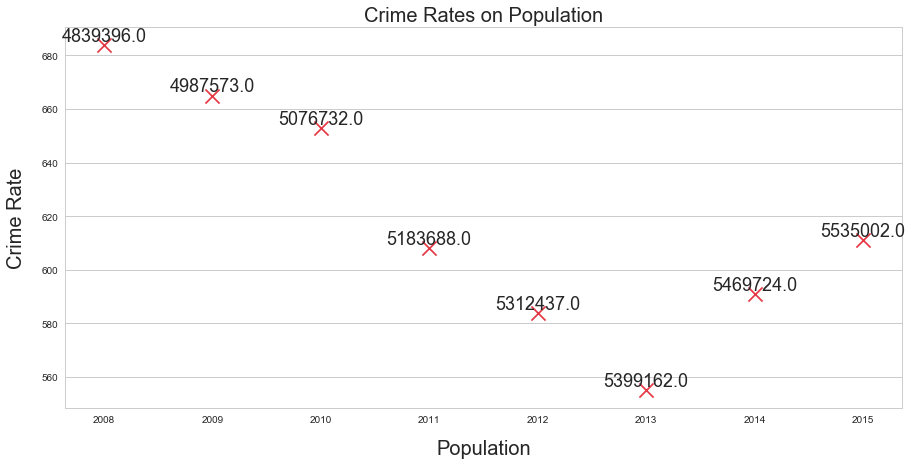

In [134]:
%matplotlib inline 
import pandas as pd
import pymongo
from pymongo import MongoClient
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

client = MongoClient()
db = client['pds_CA2']

dataCrime = pd.DataFrame(list(db.crimeRates.find()))
dataPopulation = pd.DataFrame(list(db.populationSize.find()))

# Plotting
scatterPlot = plt.figure(figsize=(15,7))
axis3 = scatterPlot.add_subplot(111)
## Set title
plt.title('Crime Rates on Population', fontsize=20)
## Set x and y labels
plt.xlabel('Population', fontsize=20, labelpad=15)
plt.ylabel('Crime Rate', fontsize=20, labelpad=15)

n = dataPopulation['population']
y = dataCrime['overall_crime_rate']
x = dataPopulation['year']

axis3.scatter(x,y, marker='x', s=200,color='#e63946',linewidths=1) 
for i, txt in enumerate(n):
    axis3.annotate(txt, (x[i], y[i]),ha='center', va='bottom', size=18)  
plt.grid(axis='x')
plt.show()

# Crime Activities - Line Chart

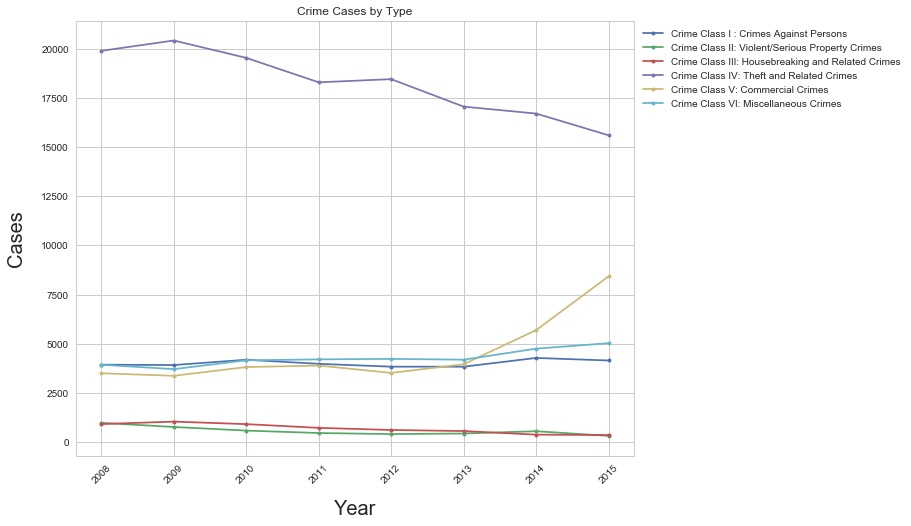

In [71]:
%matplotlib inline
import pandas as pd
import pymongo
from pymongo import MongoClient
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

client = MongoClient()
db = client['pds_CA2']

dataCrimeT = pd.DataFrame(list(db.crimeRatesTypes.find()))

types = dataCrimeT['crime_classes'].unique()

# Used to plot lines
def plotLines (type_list):
    for typeC in type_list:
        # Set what rows of data are used
        dataUsed = dataCrimeT.loc[dataCrimeT['crime_classes']==typeC]
        axis4.plot(dataUsed['year'], dataUsed['crime_cases'], label=typeC, marker = 'o',markersize=4)
        
# Plotting
linePlot = plt.figure(figsize=(10,8))
axis4 = linePlot.add_subplot(111)
## Set title
plt.title('Crime Cases by Type')
## Set x and y labels
plt.xlabel('Year', fontsize=20, labelpad=15)
plt.ylabel('Cases', fontsize=20, labelpad=15)
## Rotate x ticks
plt.xticks(rotation=45)
plotLines(types)
axis4.legend(loc="upper left",bbox_to_anchor=(1,1), fontsize=10)
plt.show()

# Compare Market Share of Mobile, Desktop and Tablets - Line Chart

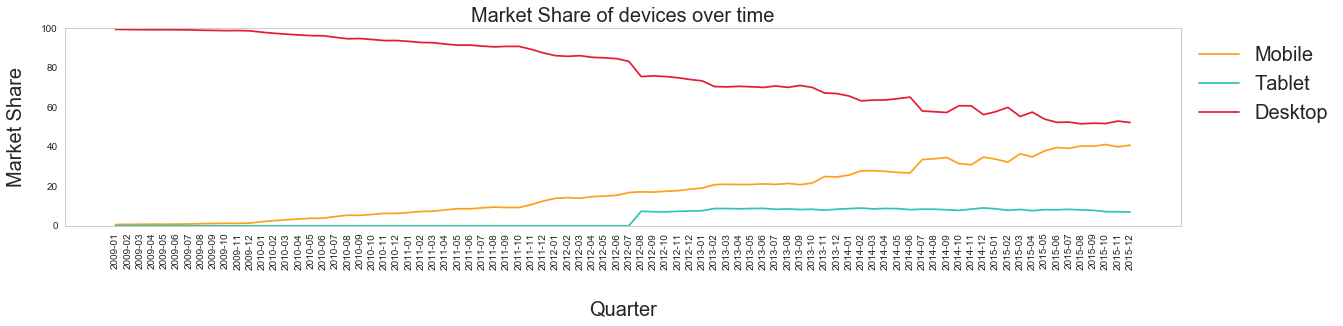

In [136]:
%matplotlib inline
import pandas as pd
import pymongo
from pymongo import MongoClient
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

client = MongoClient()
db = client['pds_CA2']

deviceCompare = pd.DataFrame(list(db.deviceCompare.find()))

# Plotting
linePlot = plt.figure(figsize=(20,8))
axis5 = linePlot.add_subplot(211)
## Set title
plt.title('Market Share of devices over time', fontsize=20)
## Set x and y labels
plt.xlabel('Quarter', fontsize=20, labelpad=30)
plt.ylabel('Market Share', fontsize=20, labelpad=15)
## Rotate x ticks
plt.xticks(rotation=90)
# Plotting each individual line
axis5.plot(deviceCompare['Date'], deviceCompare['Mobile'], color='#ff9f1c')
axis5.plot(deviceCompare['Date'], deviceCompare['Tablet'], color='#2ec4b6')
axis5.plot(deviceCompare['Date'], deviceCompare['Desktop'], color='#e71d36')
axis5.legend(loc="upper left",bbox_to_anchor=(1,1), fontsize=20)
axis5.grid()
plt.ylim(0,100)
plt.show()

# Compare Market Share of Mobile, Desktop and Tablets at end 2015 - Pie Chart

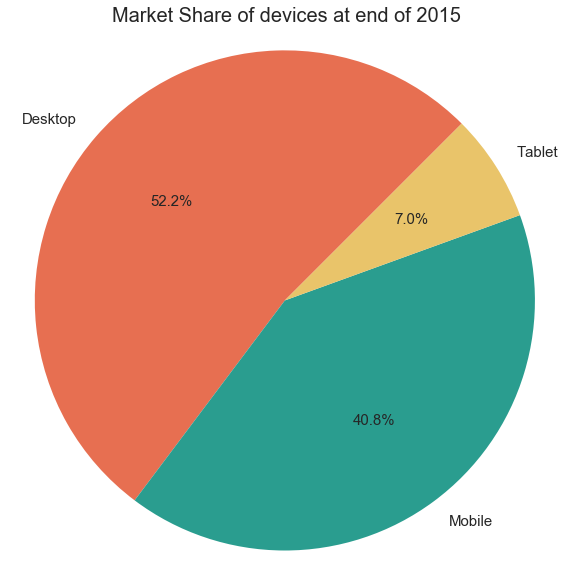

In [129]:
%matplotlib inline
import pandas as pd
import pymongo
from pymongo import MongoClient
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

client = MongoClient()
db = client['pds_CA2']

deviceCompare = pd.DataFrame(list(db.deviceCompare.find()))
# GET 2015 DATA
data = deviceCompare.iloc[83:,]  # 73 to 84
data = data.drop(columns=['Date', '_id'])
labels = data.columns.values
# Plotting
pieChart = plt.figure(figsize=(10,10))
axis51 = pieChart.add_subplot(111)
## Set title
plt.title('Market Share of devices at end of 2015', fontsize=20)
# Plotting pie
colors = ['#e76f51', '#2a9d8f', '#e9c46a']
axis51.pie(data.T, labels=labels, autopct='%1.1f%%', startangle=45, colors = colors, textprops={'fontsize': 15})
axis51.axis('equal')
plt.show()

# Data Usage from (2008-2015) - Line Plot

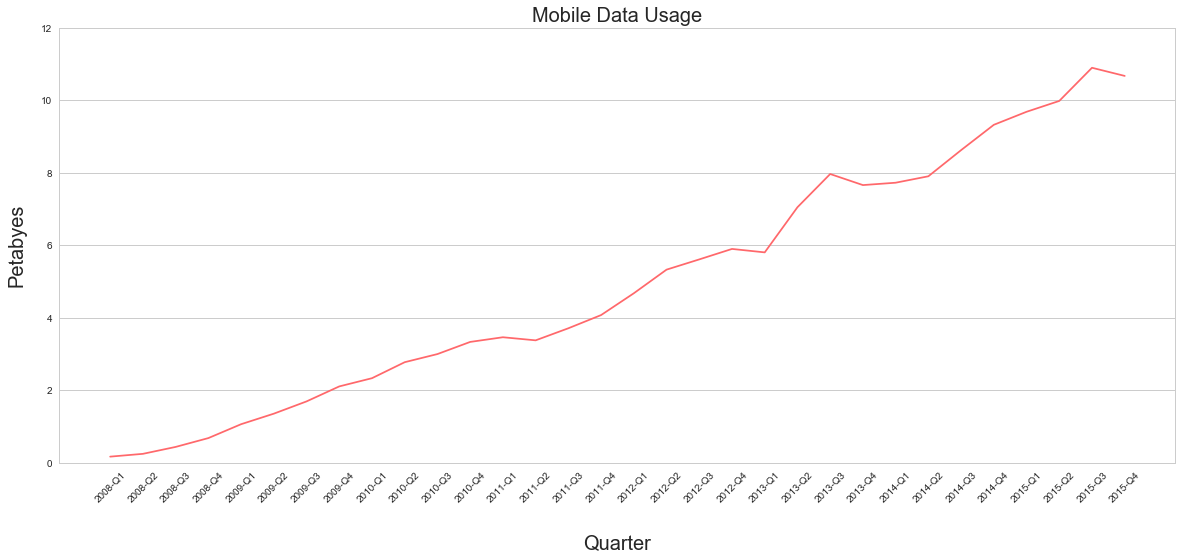

In [146]:
%matplotlib inline
import pandas as pd
import pymongo
from pymongo import MongoClient
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

client = MongoClient()
db = client['pds_CA2']

dataUsage = pd.DataFrame(list(db.mobileDataUsage.find()))

# Plotting
linePlot = plt.figure(figsize=(20,8))
axis6 = linePlot.add_subplot(111)
## Set title
plt.title('Mobile Data Usage', fontsize=20)
## Set x and y labels
plt.xlabel('Quarter', fontsize=20, labelpad=30)
plt.ylabel('Petabyes', fontsize=20, labelpad=15)
## Rotate x ticks
plt.xticks(rotation=45)
# Plotting each individual line
axis6.plot(dataUsage['quarter'], dataUsage['volume_of_mobile_data'], color='#ff686b')
axis6.grid(axis='x')
plt.ylim(0,12)
plt.show()

# Mobile Activities - Box Plot

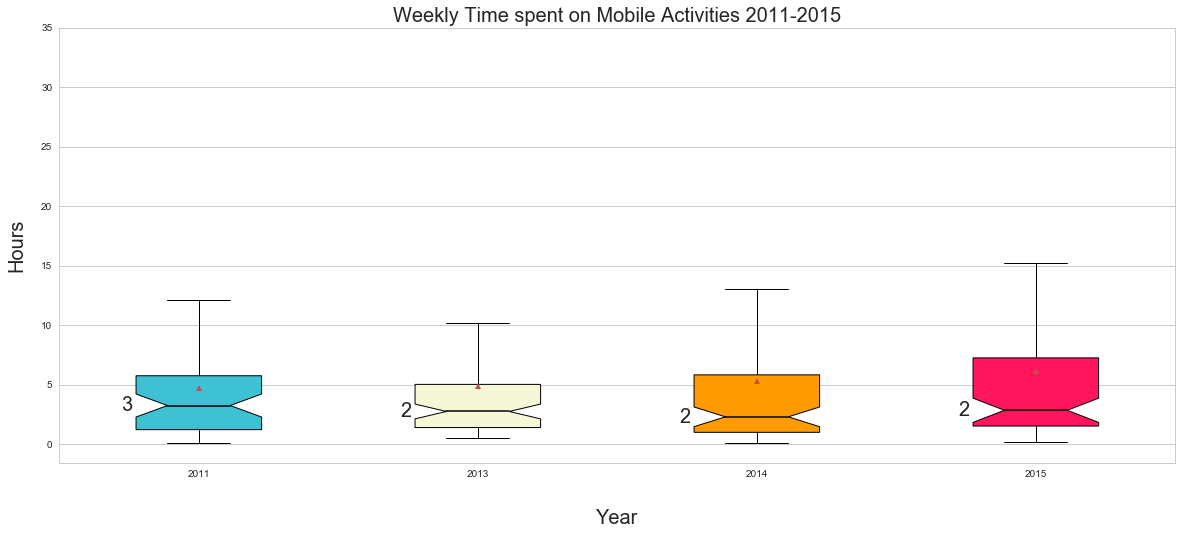

In [36]:
%matplotlib inline
import pandas as pd
import pymongo
from pymongo import MongoClient
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='whitegrid')

client = MongoClient()
db = client['pds_CA2']

weeklyMedia = pd.DataFrame(list(db.weeklyTimeMedia.find()))
years = np.arange(2011,2016)
# Remove 2012
years = np.delete(years, 1, axis=0)

# store mean hours for each yaer
m11 = weeklyMedia['mean_hours'].loc[weeklyMedia['year']==2011]
m13 = weeklyMedia['mean_hours'].loc[weeklyMedia['year']==2013]
m14 = weeklyMedia['mean_hours'].loc[weeklyMedia['year']==2014]
m15 = weeklyMedia['mean_hours'].loc[weeklyMedia['year']==2015]

data = np.array([(m11.tolist()),(m13.tolist()), (m14.tolist()), (m15.tolist())])
# Plotting
boxPlot = plt.figure(figsize=(20,8))
axis7 = boxPlot.add_subplot(111)
## Set title
plt.title('Weekly Time spent on Mobile Activities 2011-2015', fontsize=20)
## Set x and y labels
plt.xlabel('Year', fontsize=20, labelpad=30)
plt.ylabel('Hours', fontsize=20, labelpad=15)
boxPlot = axis7.boxplot(data, patch_artist=True, labels=years, notch=True, showmeans=True)
# Change color of median line
for median in boxPlot['medians']:
    median.set(color='k', linewidth=1.5)
# Change color of box plot
colors = ['#3ec1d3', '#f6f7d7', '#ff9a00', '#ff165d']
changeColor = list(zip(boxPlot['boxes'], colors))
for patch, color in changeColor:
    patch.set_facecolor(color)
# Displaying values of median
for line in boxPlot['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    plt.text(x-0.35, y, '%i' % y,
         horizontalalignment='right', va='center', fontsize=20) # draw above, right align
plt.grid(axis='x')
plt.show()

# WeeklyTime Spent on Media Activities 

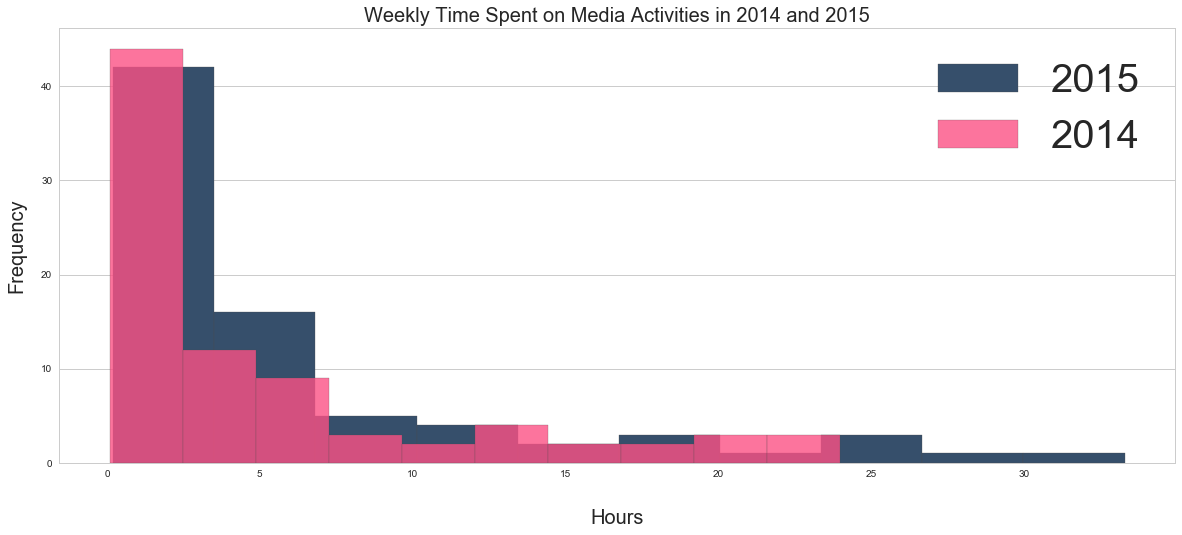

In [163]:
%matplotlib inline
import pandas as pd
import pymongo
from pymongo import MongoClient
import matplotlib.pyplot as plt


client = MongoClient()
db = client['pds_CA2']

weeklyMedia = pd.DataFrame(list(db.weeklyTimeMedia.find()))

weeklyMedia2015 = weeklyMedia.loc[weeklyMedia['year']==2015]
weeklyMedia2015 = weeklyMedia2015.reset_index(drop=True)

weeklyMedia2014 = weeklyMedia.loc[weeklyMedia['year']==2014]
weeklyMedia2014 = weeklyMedia2014.reset_index(drop=True)

# Plotting
histPlot = plt.figure(figsize=(20,8))
axis8 = histPlot.add_subplot(111)
## Set title
plt.title('Weekly Time Spent on Media Activities in 2014 and 2015', fontsize=20)
## Set x and y labels
plt.xlabel('Hours', fontsize=20, labelpad=30)
plt.ylabel('Frequency', fontsize=20, labelpad=15)
axis8.hist(weeklyMedia2015['mean_hours'], label='2015', histtype='bar', color='#364f6b', edgecolor='#4d4c4c')
axis8.hist(weeklyMedia2014['mean_hours'], label='2014', histtype='bar', color='#fc5185', edgecolor='#4d4c4c', alpha=0.8)
axis8.legend(loc='upper right', prop={'size': 40})
plt.grid(axis='x')
plt.show()